<a href="https://colab.research.google.com/github/Aswin-Cheerngodan/CNN/blob/main/CF100ALX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Dependencies

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Input,Dropout
from tensorflow.keras.applications import ResNet101,EfficientNetV2L
from tensorflow.keras.utils import to_categorical

### Data loading

In [2]:
(X_train,y_train),(X_test,y_test) = cifar100.load_data()

labels = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [3]:
print(y_train[0])

[19]


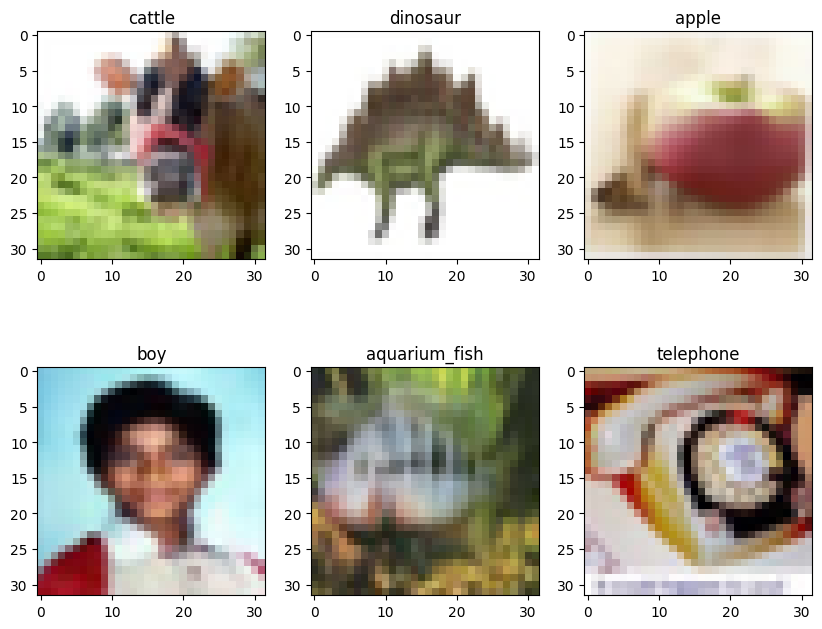

In [4]:
plt.figure(figsize=(10,8))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(X_train[i])
    plt.title(labels[y_train[i][0]])
plt.show()

### Data preprocessing

In [5]:
X_train = X_train/255
X_test = X_test/255

In [6]:
y_train = to_categorical(y_train,100)
y_test = to_categorical(y_test,100)

### Model building

In [14]:
res101 = ResNet101(include_top=False,weights='imagenet',input_shape=(32, 32, 3),classes=100)

for layer in res101.layers:
  layer.trainable = False

In [15]:
model1 = Sequential([
    Input(shape=((32, 32, 3))),
    res101,
    Flatten(),
    Dense(1024,activation='relu',),
    Dropout(0.3),
    Dense(512,activation='relu'),
    Dropout(0.2),
    Dense(len(labels),activation='softmax')

])

In [16]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet101 (Functional)               │ (None, 1, 1, 2048)          │      42,658,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          51,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,332,452 (172.93 MB)

 Trainable params: 45,227,108 (172.53 MB)

 Non-trainable params: 105,344 (411.50 KB)

In [17]:
model1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### Training

In [18]:
histroy = model1.fit(X_train,y_train,batch_size=64,epochs=10,validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 172s 91ms/step - accuracy: 0.0289 - loss: 4.6060 - val_accuracy: 0.0088 - val_loss: 6.1219
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.0946 - loss: 3.8516 - val_accuracy: 0.0782 - val_loss: 4.6061
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 79ms/step - accuracy: 0.1546 - loss: 3.4444 - val_accuracy: 0.0996 - val_loss: 5.1582
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 74ms/step - accuracy: 0.2045 - loss: 3.2196 - val_accuracy: 0.1393 - val_loss: 3.7343
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 74ms/step - accuracy: 0.2607 - loss: 2.8969 - val_accuracy: 0.1766 - val_loss: 3.5881
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - accuracy: 0.2655 - loss: 2.8817 - val_accuracy: 0.1737 - val_loss: 3.4975
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 75ms/step - accuracy: 0.2406 - loss: 3.0560 - val_accuracy: 0.2692 - val_loss: 2.9451
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 74ms/step - accuracy: 0.2943 - loss: 2.7424 -

In [20]:
acc,score = model1.evaluate(X_test,y_test)

print(f"Accuracy : {score}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.2721 - loss: 2.9064
Accuracy : 0.267300009727478
